# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

**Notebook generated with AI assistance. Please interpret code and results with caution and consult original data and documentation as needed.**

---

This notebook provides an interactive introduction to [Dandiset 001361, version 0.250406.0045](https://dandiarchive.org/dandiset/001361/0.250406.0045):  
**"A flexible hippocampal population code for experience relative to reward"** by Sosa, Plitt, & Giocomo (2025, Nature Neuroscience).  

---

## Overview

This Dandiset contains two-photon calcium imaging and behavioral datasets from the CA1 area of the mouse hippocampus. Mice navigate virtual linear tracks with changing hidden reward locations, and their neural and behavioral responses are recorded. The data include:
- Raw and processed optical physiology (ophys) measurements (e.g., calcium traces)
- Behavioral data (licking, position, speed, rewards)
- ROI segmentation and metadata

Data are provided in NWB format, compatible with the [Neurodata Without Borders](https://www.nwb.org/) ecosystem.

---

## What this notebook covers

- How to use the DANDI API to explore Dandiset 001361
- How to remotely stream NWB files from the archive
- Navigating the structure of a representative NWB file
- Visualizing behavioral and calcium imaging data  
- Laying groundwork for further reanalysis

---

## Requirements

This notebook requires the following packages (assumed installed):

- pynwb
- h5py
- remfile
- dandi
- numpy
- pandas
- matplotlib

---

Let's get started!


## 1. Connect to DANDI and List Available Assets

We'll use the DANDI Python client library to access the public assets in this Dandiset.  
For illustration, we'll focus on NWB files corresponding to mouse `sub-m11`.

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to the DANDI Archive and access the specific Dandiset and version
dandiset_id = "001361"
dandiset_version = "0.250406.0045"

client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# List all NWB files for subject m11 in this dandiset
nwb_assets = [
    asset
    for asset in dandiset.get_assets()
    if asset.path.startswith("sub-m11/") and asset.path.endswith(".nwb")
]

print(f"Found {len(nwb_assets)} NWB files for sub-m11:")
for asset in nwb_assets:
    print(f" - {asset.path}")

Found 12 NWB files for sub-m11:
 - sub-m11/sub-m11_ses-05_behavior+ophys.nwb
 - sub-m11/sub-m11_ses-04_behavior+ophys.nwb
 - sub-m11/sub-m11_ses-07_behavior+ophys.nwb
 - sub-m11/sub-m11_ses-06_behavior+ophys.nwb
 - sub-m11/sub-m11_ses-08_behavior+ophys.nwb
 - sub-m11/sub-m11_ses-10_behavior+ophys.nwb
 - sub-m11/sub-m11_ses-03_behavior+ophys.nwb
 - sub-m11/sub-m11_ses-09_behavior+ophys.nwb
 - sub-m11/sub-m11_ses-11_behavior+ophys.nwb
 - sub-m11/sub-m11_ses-12_behavior+ophys.nwb
 - sub-m11/sub-m11_ses-13_behavior+ophys.nwb
 - sub-m11/sub-m11_ses-14_behavior+ophys.nwb


## 2. Load a Sample NWB File Remotely

We'll pick one session (`sub-m11/sub-m11_ses-05_behavior+ophys.nwb`) to demonstrate data access and visualization.

We use `remfile` and `h5py` to stream the NWB file directly from the cloud—no download required!

In [2]:
import remfile
import h5py
import pynwb

# Choose a session to explore
asset_path = "sub-m11/sub-m11_ses-05_behavior+ophys.nwb"
asset = next(dandiset.get_assets_by_glob(asset_path))

print(f"Streaming remote NWB file: {asset.path}")

# Open remote NWB file for reading
remote_file = remfile.File(asset.download_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()
print(f"Loaded NWB session: {nwb.identifier}")

Streaming remote NWB file: sub-m11/sub-m11_ses-05_behavior+ophys.nwb


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Loaded NWB session: /data/InVivoDA/GCAMP11/25_02_2023/Env1_LocationA_to_C


## 3. Inspecting the NWB File: Session and Subject Information

In [3]:
from datetime import datetime

print("Session description:", nwb.session_description)
print("Session start time:", nwb.session_start_time)
print("Session ID:", nwb.session_id)
print("---")
print("Subject ID:", nwb.subject.subject_id)
print("Species:", nwb.subject.species)
print("Sex:", nwb.subject.sex)
print("Date of birth:", nwb.subject.date_of_birth.date())
if hasattr(nwb.subject, "age__reference"):
    print("Age at reference (if provided):", nwb.subject.age__reference)
print("---")
print("Experimenter:", nwb.experimenter)

Session description: processed suite2p data
Session start time: 2023-02-25 00:00:00-08:00
Session ID: 05
---
Subject ID: m11
Species: Mus musculus
Sex: M
Date of birth: 2022-09-20
Age at reference (if provided): birth
---
Experimenter: ('Mari Sosa',)


## 4. Overview of Acquisition and Processed Data

The file stores:
- **Acquisition**: Raw two-photon imaging
- **Processing modules**: Behavior, ophys (processed), segmentation data

Let's see the available acquisition and processing modules:

In [4]:
print("Acquisition modules:", list(nwb.acquisition.keys()))
print("Processing modules:", list(nwb.processing.keys()))

Acquisition modules: ['TwoPhotonSeries']
Processing modules: ['behavior', 'ophys']


## 5. Exploring Behavioral Data: Virtual Navigation, Licking, Rewards

All behavioral data are in the `behavior` processing module, under a `BehavioralTimeSeries` interface.  
Let's extract key behavioral variables: position, speed, licking, and rewards.

In [5]:
import numpy as np

behavior = nwb.processing["behavior"]
bts = behavior.data_interfaces["BehavioralTimeSeries"]

# Grab time series of interest
position = bts.time_series["position"]
speed = bts.time_series["speed"]
lick = bts.time_series["lick"]
reward_zone = bts.time_series["reward_zone"]
reward = bts.time_series["Reward"]

print("Position data:", position.data.shape)
print("Speed data:", speed.data.shape)
print("Lick data:", lick.data.shape)
print("Reward zone data:", reward_zone.data.shape)
print("Reward times:", reward.timestamps.shape)

Position data: (20684,)
Speed data: (20684,)
Lick data: (20684,)
Reward zone data: (20684,)
Reward times: (69,)


Let's visualize the mouse's trajectory and behavior around reward delivery events.
Note: We're using `.interval` and the length of the timestamps to estimate the time axis.

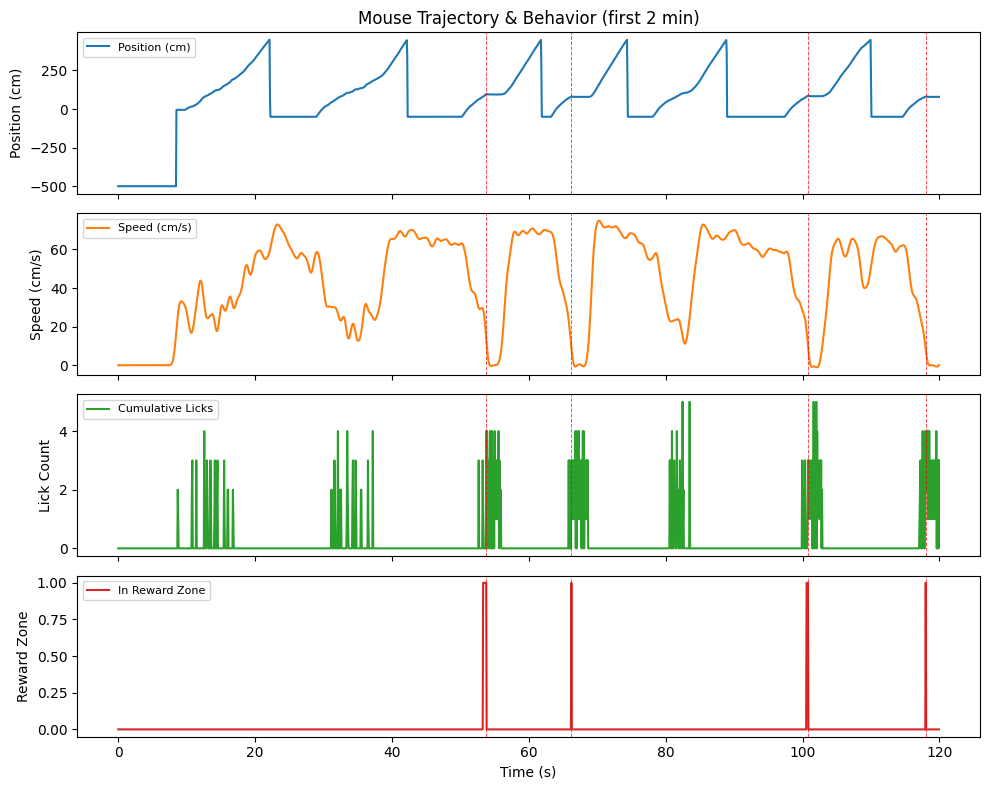

In [6]:
import matplotlib.pyplot as plt

# Use .timestamps if available, else construct time vector from sample rate (here, .interval=1, 1:1 with frames)
# Some NWB objects may lack a 'rate' parameter; in that case, rely on available timebase.
# The `timestamps` arrays are guaranteed by the metadata to be same length as the data arrays.

# Determine how much data to plot (first 2 minutes or less)
position_t = position.timestamps[:]
speed_t = speed.timestamps[:]
lick_t = lick.timestamps[:]
reward_zone_t = reward_zone.timestamps[:]

plot_dur = 120  # seconds
max_len = np.sum(position_t < plot_dur)

time = position_t[:max_len]
pos = position.data[:max_len]
spd = speed.data[:max_len]
licks = lick.data[:max_len]
reward_zone_bin = reward_zone.data[:max_len] > 0.5
reward_events = reward.timestamps[:]

fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
axs[0].plot(time, pos, label="Position (cm)", color="C0")
axs[0].set_ylabel("Position (cm)")
axs[0].set_title("Mouse Trajectory & Behavior (first 2 min)")
axs[1].plot(time, spd, label="Speed (cm/s)", color="C1")
axs[1].set_ylabel("Speed (cm/s)")
axs[2].plot(time, licks, label="Cumulative Licks", color="C2")
axs[2].set_ylabel("Lick Count")
axs[3].plot(time, reward_zone_bin, label="In Reward Zone", color="C3")
axs[3].set_ylabel("Reward Zone")
axs[3].set_xlabel("Time (s)")

# Mark reward times
for ax in axs:
    for rt in reward_events:
        if rt < plot_dur:
            ax.axvline(rt, color="red", linestyle="--", linewidth=0.7, alpha=0.7)

for ax in axs:
    ax.legend(fontsize=8)
plt.tight_layout()
plt.show()

**Interpretation:**  
- Each vertical red dashed line indicates a reward delivery time.  
- Observe licking and speeds relative to rewards and reward zone entry.

This view provides a quick glance at the behavioral structure of the experiment.

## 6. Exploring Calcium Imaging Data (Processed Fluorescence)

The `ophys` processing module contains processed calcium traces (Fluorescence and Deconvolved), segmentation metadata, and neuropil traces.

Let's examine the main `Fluorescence` traces for all detected ROIs (cells) and visualize the activity of a random subset across time.

Fluorescence data shape: (20684, 358)  (frames x ROIs)
Calcium imaging sampling rate: 15.5078125 Hz


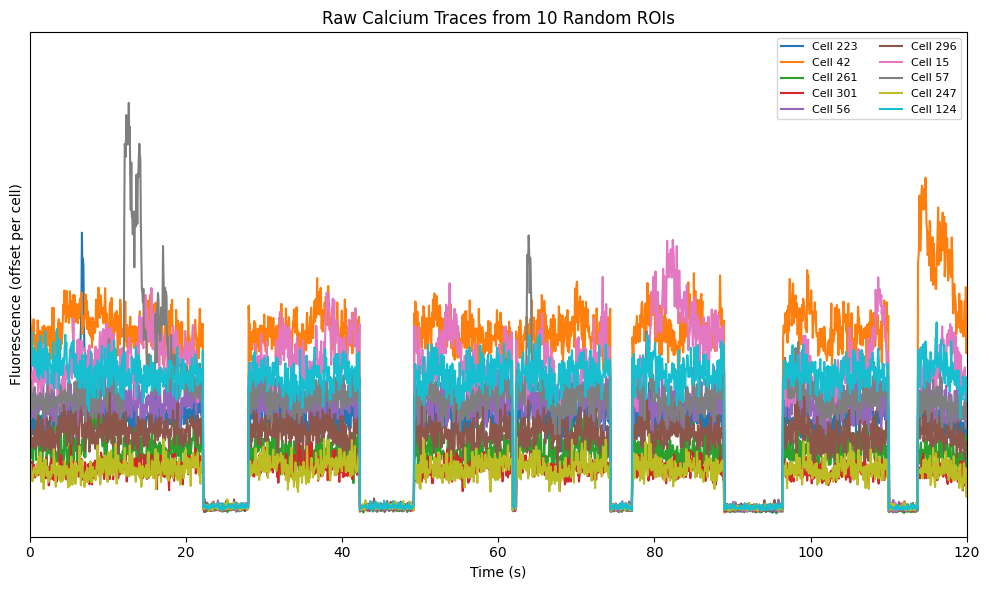

In [7]:
ophys = nwb.processing["ophys"]
Fluorescence = ophys.data_interfaces["Fluorescence"]
f_plane0 = Fluorescence.roi_response_series["plane0"]

flu_data = f_plane0.data         # shape (time, cells)
n_time = flu_data.shape[0]
n_cells = flu_data.shape[1]

# Construct time axis for calcium traces
# Use timestamps from behavior, otherwise, use index and reported rate if available
try:
    flu_rate = f_plane0.rate
except AttributeError:
    flu_rate = None
if flu_rate is not None:
    flu_time = np.arange(n_time) / flu_rate
else:
    flu_time = np.arange(n_time)

print(f"Fluorescence data shape: {flu_data.shape}  (frames x ROIs)")
print(f"Calcium imaging sampling rate: {flu_rate if flu_rate else 'unknown'} Hz")

# Subselect cells for plotting (up to 10 random ROIs)
n_show = min(10, n_cells)
np.random.seed(42)
sample_cells = np.random.choice(n_cells, n_show, replace=False)

plt.figure(figsize=(10, 6))
offset = 4
for idx, cell in enumerate(sample_cells):
    plt.plot(flu_time, flu_data[:, cell] + idx * offset, label=f"Cell {cell}")
plt.xlabel("Time (s)")
plt.ylabel("Fluorescence (offset per cell)")
plt.title(f"Raw Calcium Traces from {n_show} Random ROIs")
plt.yticks([])
plt.legend(ncol=2, fontsize=8)
plt.xlim([0, min(120, flu_time[-1])])
plt.tight_layout()
plt.show()

**Interpretation:**  
- Each trace is a cell's raw fluorescence, vertically offset for clarity.  
- These signals reflect neural population activity in hippocampal CA1 during virtual navigation.

## 7. ROI Segmentation Metadata: How Many Cells are Recorded?

ROIs ("cells") are derived from Suite2p and stored as a segmentation table.
Let's summarize and plot the distribution of iscell/probcell values (Suite2p outputs), and the number of detected cells:

                                           pixel_mask  \
id                                                      
0   [[184, 477, 20.42091], [184, 478, 24.655317], ...   
1   [[220, 548, 17.799917], [220, 549, 21.690094],...   
2   [[198, 485, 19.04672], [198, 486, 17.522465], ...   
3   [[172, 531, 11.773818], [172, 532, 19.495077],...   
4   [[148, 465, 16.043055], [148, 466, 19.642868],...   

                       iscell  planeIdx  
id                                       
0   [1.0, 0.9996045543367583]         0  
1   [1.0, 0.9983935935458714]         0  
2   [1.0, 0.9993062048252185]         0  
3   [1.0, 0.9719317970495572]         0  
4   [1.0, 0.9211749203309639]         0  
Total ROIs: 358
ROIs classified as cells: 189.0


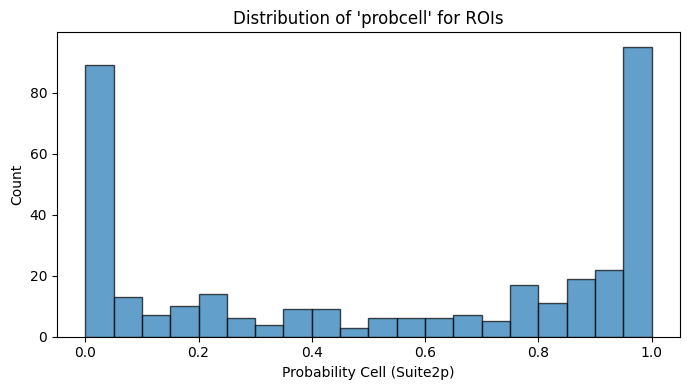

In [8]:
# ImageSegmentation metadata from Suite2p
ImageSegmentation = ophys.data_interfaces["ImageSegmentation"]
PlaneSegmentation = ImageSegmentation.plane_segmentations["PlaneSegmentation"]

roi_table = PlaneSegmentation.to_dataframe()
print(roi_table.head())

# 'iscell' has two columns: iscell (bool/int), probcell (probability)
iscell = roi_table['iscell'].apply(lambda x: x[0])
probcell = roi_table['iscell'].apply(lambda x: x[1])
num_total = len(roi_table)
num_cells = iscell.sum()

print(f"Total ROIs: {num_total}")
print(f"ROIs classified as cells: {num_cells}")

plt.figure(figsize=(7,4))
plt.hist(probcell, bins=np.linspace(0,1,21), color='C0', edgecolor='k', alpha=0.7)
plt.xlabel("Probability Cell (Suite2p)")
plt.ylabel("Count")
plt.title("Distribution of 'probcell' for ROIs")
plt.tight_layout()
plt.show()

## 8. Imaging Metadata: Devices and Planes

Let's review metadata for imaging device and parameters:

In [9]:
iplane = PlaneSegmentation.imaging_plane
print("Imaging plane location:", iplane.location)
print("Imaging indicator:", iplane.indicator)
print("Excitation wavelength:", iplane.excitation_lambda)
print("Imaging rate:", iplane.imaging_rate)
print("Grid spacing (microns):", iplane.grid_spacing[:])
print("Device (manufacturer):", iplane.device.manufacturer)

Imaging plane location: hippocampus, CA1
Imaging indicator: GCaMP7f
Excitation wavelength: 920.0
Imaging rate: 15.5078125
Grid spacing (microns): [2. 2.]
Device (manufacturer): Neurolabware


## 9. Example: Average Max-Projection and Mean-Image

Raw images (background, mean, max) are available via `Images` in the `ophys` module. Let's visualize these reference images.

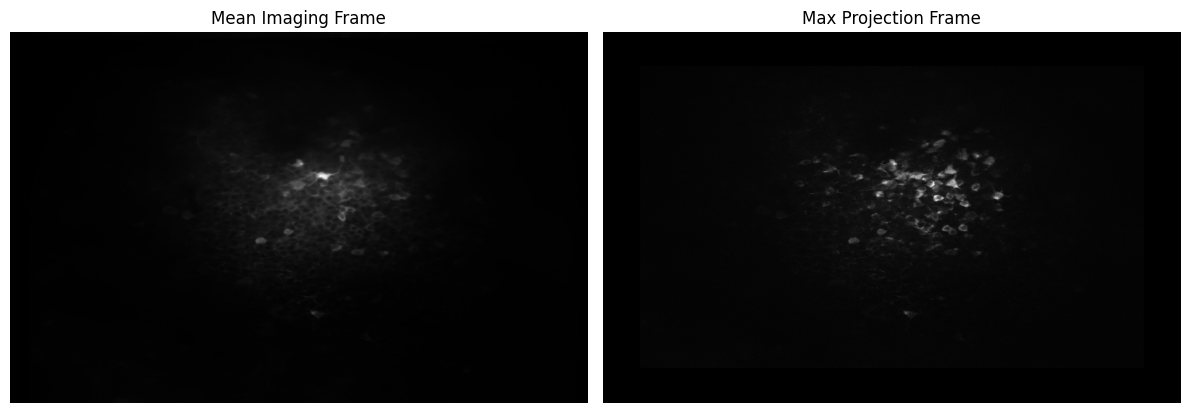

In [10]:
Images = ophys.data_interfaces["Backgrounds_0"]
meanImg = Images.images["meanImg"].data[:]
max_proj = Images.images["max_proj"].data[:]

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.imshow(meanImg, cmap='gray')
plt.title("Mean Imaging Frame")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(max_proj, cmap='gray')
plt.title("Max Projection Frame")
plt.axis('off')
plt.tight_layout()
plt.show()

## Summary and Next Steps

In this notebook, we introduced Dandiset 001361, accessed NWB files remotely, and visualized representative behavioral and imaging data. This should provide a foundation for:

- Exploring how hippocampal population codes adapt to reward relocation
- Linking cell activity to behavior or position
- Advanced analyses (e.g., identifying place or reward-responsive cells, event-triggered averaging, etc.)

For further reanalysis, check out the [custom analysis code](https://github.com/GiocomoLab/Sosa_et_al_2024) provided by the authors.

---  
*You are encouraged to adapt and extend this notebook for your own analyses!*